In [1]:
import sys
sys.path.append('/NDDepth/src')

In [2]:
from PIL import Image
import torch
import tqdm
from torch.utils.data import DataLoader
import torch.nn.functional as F

import matplotlib.pyplot as plt
from model import Model, ModelConfig
from dataloader.BaseDataloader import BaseImageDataset
from dataloader.NYUDataloader import NYUImageData

#torch.manual_seed(42)
MODEL_PATH = "./model.pth"

device = "cuda:0"

test_dataset = BaseImageDataset('test', NYUImageData, '/scratchdata/nyu_depth_v2/official_splits/test', '/NDDepth/src/nyu_test.csv')
test_dataloader = DataLoader(test_dataset, batch_size=6, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


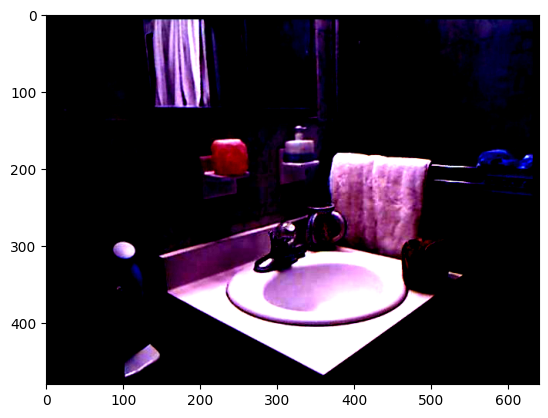

In [12]:
for i, data in enumerate(test_dataloader):
    break
plt.imshow(data["pixel_values"][0].squeeze().permute(1, 2, 0))

In [6]:
config =  ModelConfig("tiny07")
config.batch_size = 6
config.height = 480//4
config.width = 640//4
model = Model(config).to(device)
model.backbone.backbone.from_pretrained("microsoft/swinv2-tiny-patch4-window8-256")

Swinv2Backbone(
  (embeddings): Swinv2Embeddings(
    (patch_embeddings): Swinv2PatchEmbeddings(
      (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
    )
    (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): Swinv2Encoder(
    (layers): ModuleList(
      (0): Swinv2Stage(
        (blocks): ModuleList(
          (0-1): 2 x Swinv2Layer(
            (attention): Swinv2Attention(
              (self): Swinv2SelfAttention(
                (continuous_position_bias_mlp): Sequential(
                  (0): Linear(in_features=2, out_features=512, bias=True)
                  (1): ReLU(inplace=True)
                  (2): Linear(in_features=512, out_features=3, bias=False)
                )
                (query): Linear(in_features=96, out_features=96, bias=True)
                (key): Linear(in_features=96, out_features=96, bias=False)
                (value): Linear(in_features=96, out_features=96, bi

In [9]:
for k in data.keys(): data[k] = data[k].to(device)
d1_list, u1, d2_list, u2, norm_est, dist_est = model(data)

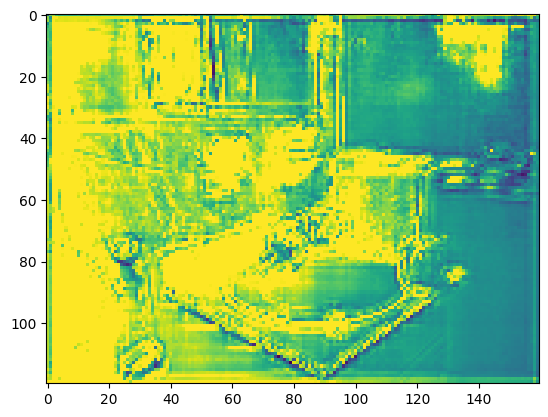

In [20]:
plt.imshow(d2_list[3][0].cpu().detach().squeeze())